# Projekt (Wprowadzenie do uczenia maszynowego)

## Wykonawcy:
* Piotr Mariusz Kozikowski
* Kacper Dulewicz
* Anna Kaczmarek

### Matematyka stosowana, II semestr, studia II stopnia

---

## Opis analizowanych danych

Na potrzeby niniejszego projektu wykorzystano zbiór danych dotyczący **Pokémonów**, fikcyjnych stworzeń znanych z serii gier wydawanych na konsole firmy Nintendo. Mają one różne kształty i rozmiary, a każdy gatunek posiada unikatowe moce, które może wykorzystać w walce. Doświadczone Pokémony mogą przeobrazić się w potężniejsze i inaczej wyglądające formy, co też określa się mianem ewolucji przez kolejne **generacje** (*generation*). Wśród tych stworzeń można również wyróżnić **legendarne** (*legendary*) Pokémony, które stanowią zdecydowaną mniejszość spośród **ponad 1000 gatunków**. 

Typy Pokémonów (*type1*) są związane m.in. z **żywiołami** (woda, ogień, powietrze, ziemia), jak i **umiejętnościami** (latające, pływające) oraz **wpływem na percepcję przeciwnika** (psychiczne, duchowe). W celu ustalenia ich mocy, korzysta się z następujących statystyk, które są opisane w pliku jak poniżej:

* *hp* (**Health Points**) - punkty zdrowia,
* *attack* (**Attack**) - punkty ataku,
* *defense* (**Defense**) - punkty obrony,
* *sp_attack* (**Special Attack**) - punkty specjalnego ataku,
* *sp_defense* (**Special Defense**) - punkty specjalnej obrony,
* *speed* (**Speed**) - punkty szybkości.

Są to oczywiście zmienne numeryczne ciągłe, zaś typy stworzeń są opisane za pomocą zmiennych tekstowych. Wśród zmiennych pojawia się też zmienna *total*, lecz stanowi ona wyłącznie zsumowaną liczbę punktów ze wszystkich wspomnianych statystyk.

Na potrzeby przeprowadzenia analizy danych pod względem problemów klasyfikacji i klasteryzacji (*analiza skupień*), ze zbioru danych wczytanego do ramki danych za pomocą biblioteki Pandas (**pandas**) usunięte zostaną kolumny *number* (numer porządkowy Pokémona równoważny indeksowi), *name* (nazwa Pokémona), *type2* (szczegółowy typ Pokémona odnoszący się do jego specjalnych umiejętności),
*total*, *generation* oraz *legendary*. Tak zmodyfikowany zbiór danych zostanie oczyszczony z wartości brakujących i wyeksportowany do pliku .csv na potrzeby rozwiązania problemów klasteryzacji i regresji. W pliku dotyczącym problemu regresyjnego, zmienna *type1*, później znana jako *class* zostanie uwzględniona w postaci zmiennych sztucznych (**dummy variables**).



### Import niezbędnych bibliotek do przeprowadzenia analizy

In [1]:
import pandas as pd # Biblioteka niezbędna do utworzenia ramek danych, operacji na nich oraz eksporcie oczyszczonych danych do pliku tekstowego
import numpy as np # Biblioteka niezbędna do tworzenia danych numerycznych, potrzebnych do wygenerowania wykresów
import matplotlib.pyplot as plt # Biblioteka niezbędna do utworzenia wykresów opisujących miary klasyfikacji

### Oczyszczenie danych i ich analiza statystyczna 

In [2]:
# Wczytanie zbioru danych do ramki danych
pokemon_df = pd.read_csv('Pokemon.csv')

# Wyświetlenie wczytanej ramki danych
pokemon_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


In [3]:
# Sprawdzenie, w których kolumnach występują wartości brakujące
pokemon_df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [4]:
# Usunięcie kolumn niewymaganych do przeprowadzenia analiz
pokemon_df.drop(['number', 'name', 'type2', 'total', 'generation', 'legendary'], axis=1, inplace=True)

# Ponowne wyświetlenie ramki danych po usunięciu kolumn
pokemon_df

,type1,hp,attack,defense,sp_attack,sp_defense,speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Grass,80,82,83,100,100,80
...,...,...,...,...,...,...,...
1067,Ice,100,145,130,65,110,30
1068,Ghost,100,65,60,145,80,130
1069,Psychic,100,80,80,80,80,80
1070,Psychic,100,165,150,85,130,50


In [5]:
# Zmiana nazwy kolumny 'type1' na 'class' w celu ujednolicenia zapisu
pokemon_df.rename(columns={'type1': 'class'}, inplace=True)

# Ponowne wyświetlenie ramki danych
pokemon_df

,class,hp,attack,defense,sp_attack,sp_defense,speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Grass,80,82,83,100,100,80
...,...,...,...,...,...,...,...
1067,Ice,100,145,130,65,110,30
1068,Ghost,100,65,60,145,80,130
1069,Psychic,100,80,80,80,80,80
1070,Psychic,100,165,150,85,130,50


In [6]:
# Wyświetlenie unikalnych typów (klas) Pokémonów
print("Unikalne typy Pokémonów:")
print(pokemon_df['class'].unique())

Unikalne typy Pokémonów:
['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying' 'Graass']


In [7]:
# Korekta wynikająca z literówki występującej w zbiorze danych
pokemon_df.replace({'class': {'Graass': 'Grass'}}, inplace=True)

# Ponowne wyświetlenie unikalnych typów Pokémonów
print("Unikalne typy Pokémonów:")
print(pokemon_df['class'].unique())

# Wyświetlenie liczby unikalnych typów Pokémonów
print(f"Liczba typów Pokémonów: {len(pokemon_df['class'].unique())}")

Unikalne typy Pokémonów:
['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying']
Liczba typów Pokémonów: 19


In [8]:
# Utworzenie klasy typu factor (zawierającej numery odpowiadające klasom Pokémonów)
pokemon_df['num_class'] = pd.factorize(pokemon_df['class'])[0] + 1

In [9]:
# Wyświetlenie ostatecznej ramki danych po oczysczeniu
pokemon_df

,class,hp,attack,defense,sp_attack,sp_defense,speed,num_class
0,Grass,45,49,49,65,65,45,1
1,Grass,60,62,63,80,80,60,1
2,Grass,80,82,83,100,100,80,1
3,Grass,80,100,123,122,120,80,1
4,Grass,80,82,83,100,100,80,1
...,...,...,...,...,...,...,...,...
1067,Ice,100,145,130,65,110,30,11
1068,Ghost,100,65,60,145,80,130,17
1069,Psychic,100,80,80,80,80,80,15
1070,Psychic,100,165,150,85,130,50,15


In [10]:
# Eksport oczyszczonego zbioru danych do pliku .csv
pokemon_df.to_csv('pokemon_clean.csv', encoding='utf-8')

In [11]:
# Wyświetlenie statystyk opisowych
pokemon_df.describe()

,hp,attack,defense,sp_attack,sp_defense,speed,num_class
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,8.440299
std,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,5.423793
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,3.000000
50%,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,7.000000
75%,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,14.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,19.000000


### Interpretacja statystyk opisowych w kontekście danych o Pokémonach:

* *hp*:

Średnia liczba punktów zdrowia wynosi 70,49, co sugeruje, że większość Pokémonów ma umiarkowaną ilość punktów zdrowia.
Minimalna liczba punktów zdrowia to 1, co wskazuje na istnienie bardzo słabych Pokémonów pod względem wytrzymałości.
Maksymalna liczba punktów zdrowia to 255, co oznacza, że istnieją niezwykle wytrzymałe Pokémony.
Mediana (50. percentyl) wynosi 68, co sugeruje, że połowa Pokémonów ma punkty zdrowia na poziomie 68 lub mniej.

* *attack*:

Średnia liczba punktów ataku wynosi 80,94, co oznacza, że typowy Pokémon ma całkiem wysoki poziom ataku.
Minimalna liczba punktów ataku to 5, co wskazuje na istnienie Pokémonów o bardzo niskim ataku.
Maksymalna liczba punktów ataku wynosi 190, co sugeruje, że są bardzo silne ofensywnie Pokémony.
Mediana to 80, co oznacza, że połowa Pokémonów ma punkty ataku na poziomie 80 lub mniej.

* *defense*:

Średnia liczba punktów obrony wynosi 74,96, co świadczy o tym, że większość Pokémonów ma umiarkowanie silną obronę.
Minimalna liczba punktów obrony to 5, co oznacza bardzo niską obronę u niektórych Pokémonów.
Maksymalna liczba punktów obrony to 250, co sugeruje istnienie bardzo odpornych Pokémonów.
Mediana wynosi 70, co wskazuje, że połowa Pokémonów ma punkty obrony na poziomie 70 lub mniej.

* *sp_attack*:

Średnia liczba punktów specjalnego ataku wynosi 73,27, co oznacza, że specjalny atak jest na podobnym poziomie jak zwyczajny atak.
Minimalna liczba punktów specjalnego ataku to 10, co sugeruje, że istnieją Pokémony o bardzo niskim ataku specjalnym.
Maksymalna liczba punktów specjalnego ataku wynosi 194, co świadczy o występowaniu bardzo silnych specjalnie ofensywnych Pokémonów.
Mediana wynosi 65, co oznacza, że połowa Pokémonów ma atak specjalny na poziomie 65 lub mniej.

* *sp_defense*:

Średnia liczba punktów specjalnej obrony to 72,48, co sugeruje, że obrona specjalna jest porównywalna do zwyczajnej.
Minimalna liczba punktów specjalnej obrony wynosi 20, co oznacza istnienie Pokémonów bardzo podatnych na specjalne ataki.
Maksymalna liczba punktów specjalnej obrony to 250, co oznacza występowanie bardzo odpornych Pokémonów pod kątem obrony specjalnej.
Mediana wynosi 70, co oznacza, że połowa Pokémonów ma obronę specjalną na poziomie 70 lub mniej.

* *speed*:

Średnia liczba punktów szybkości wynosi 68,79, co oznacza, że większość Pokémonów ma umiarkowaną szybkość.
Minimalna liczba punktów szybkości to 5, co sugeruje istnienie bardzo wolnych Pokémonów.
Maksymalna liczba punktów szybkości to 200, co oznacza, że istnieją bardzo szybkie Pokémony.
Mediana wynosi 65, co świadczy o tym, że połowa Pokémonów ma szybkość na poziomie 65 lub mniej.

* *num_class*:

Minimalna wartość wynosi 1, a maksymalna 19, co świadczy o tym, że najmniej Pokémonów przynależy do klasy 1, a najwięcej do klasy 19.
Mediana to 7, co sugeruje, że połowa Pokémonów należy do klasy 7 lub niższej.

**Wnioski:**
Rozkład statystyk Pokémonów jest dosyć szeroki, z niektórymi Pokémonami posiadającymi skrajnie niskie wartości, a innymi ekstremalnie wysokie.
Większość Pokémonów ma umiarkowane wartości ataku, obrony i szybkości, ale występują duże różnice między najsłabszymi a najsilniejszymi jednostkami.
Na podstawie analizy statystyk opisowych, można stwierdzić, iż Pokémony można podzielić na kilka grup, co może sugerować istnienie różnych klas Pokémonów w zależności od ich użyteczności w walce.

In [12]:
# Import klasy pozwalającej na wyznaczenie statystyki W i p-value w teście Shapiro-Wilka
from scipy.stats import shapiro

In [13]:
# Funkcja do obliczenia testu Shapiro-Wilka dla każdej kolumny numerycznej
def shapiro_test(df: pd.DataFrame):
    results = {}
    for col in df.select_dtypes(include='number').columns:
        stat, p_value = shapiro(df[col])
        results[col] = {'Statystyka W': stat, 'p-value': round(p_value, 3), 'Czy ma rozkład normalny?': p_value >= 0.05}
    return pd.DataFrame(results).T

# Obliczenie statystyk za pomocą testu Shapiro-Wilka
shapiro_results = shapiro_test(pokemon_df)

# Wyświetlenie statystyk
shapiro_results

,Statystyka W,p-value,Czy ma rozkład normalny?
hp,0.897409,0.0,False
attack,0.983569,0.0,False
defense,0.940416,0.0,False
sp_attack,0.961474,0.0,False
sp_defense,0.956846,0.0,False
speed,0.982188,0.0,False
num_class,0.923613,0.0,False


**Komentarz**:
Na podstawie przeprowadzonego testu Shapiro-Wilka oraz otrzymanych wartości p-value, można stwierdzić, iż rozkłady zmiennych numerycznych uwzględnionych w ramce danych nie są zgodne z rozkładem normalnym.

In [14]:
# Wyświetlenie statystyk dotyczących typów kolumn oraz liczebności obserwacji w ramce danych
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       1072 non-null   object
 1   hp          1072 non-null   int64 
 2   attack      1072 non-null   int64 
 3   defense     1072 non-null   int64 
 4   sp_attack   1072 non-null   int64 
 5   sp_defense  1072 non-null   int64 
 6   speed       1072 non-null   int64 
 7   num_class   1072 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 67.1+ KB


## Klasyfikacja danych w oparciu o wybrane modele klasyfikacyjne

---

Na potrzeby przeprowadzenia analizy pod względem problemu klasyfikacji, zdecydowano się na wykorzystanie następujących miar klasyfikacji:

* jakość klasyfikacji (*accuracy score*),
* F-measure (*F1 score*),
* czułość (*sensitivity*),
* swoistość (*specificity*).

Brak pozostałych miar klasyfikacji wynikał z problemu klasyfikacji, jaki został wybrany na potrzeby tego projektu. Innymi słowy, w przypadku problemu wieloklasowego, gdzie liczba klas przekracza 2, niemożliwe jest wykorzystanie krzywej ROC. Przy liczbie klas równej 19, również analiza macierzy pomyłek jest niezwykle trudna, gdyż taka macierz staje się nieczytelna.

Miary te zostały wyznaczone za pomocą odpowiednich metod z biblioteki Scikit-learn (**sklearn**) z klasy *metrics*.
W celu ewaluacji metod klasyfikacji wybrano następujące metody:

* metoda resubstytucji (*uczenie i testowanie na całym zbiorze danych*),
* metoda podziału na część uczącą i testującą (*w stosunku 2:1*),
* metoda krosswalidacji ($k = \{1, 13\}$),
* metoda leave-one-out (*krosswalidacja z $k = n$, gdzie $n = 1072$ to liczba obiektów w całym zbiorze*).

In [15]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_predict, LeaveOneOut

Klasyfikację danych wykonano w oparciu o następujące modele klasyfikacyjne dostępne w ramach biblioteki Scikit-learn (**w środowisku Python**) i RWeka (**w środowisku R**):

* naiwny klasyfikator Bayesa (*MultinomialNB*),
* SVM (*LinearSVC*),
* regresja logistyczna (*LogisticRegression*),
* 1NN (*KNeighborsClassifier, gdzie $k = 1$*),
* kNN (*KNeighborsClassifier, gdzie $k = 13$*),
* MultilayerPerceptron (*MLPClassifier*),
* J48 (*klasyfikator w bibliotece RWeka*),
* RandomForest (*RandomForestClassifier*),
* RandomTree (*klasyfikator w bibliotece RWeka*).

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Zamiana ramki danych na tablicę NumPy
pokemon_array = pokemon_df.to_numpy()

# Wycięcie danych numerycznych służących jako dane do klasyfikacji
pokemon_X = pokemon_array[:, 1:-1]

# Wycięcie danych służących jako zmienna klasyfikująca
pokemon_y = pokemon_array[:, -1].astype('int64')

In [18]:
# Utworzenie listy nazw klasyfikatorów
classifiers_names = ['Naive Bayes', 'SVM', 'Logistic Regression', '1NN', '13NN', 'Multilayer Perceptron', 'J48 (C4.5)', 'Random Forest', 'Random Tree']

# Utworzenie listy nazw metod ewaluacji
validation_methods = ['metoda resubstytucji', 'podział zbioru', 'walidacja krzyżowa', 'leave-one-out']

# Utworzenie nazw kolumn ramki danych zawierającej wyniki analizy problemu klasyfikacji
new_df_cols = ['Typ metody klasyfikacji', 'Typ metody ewaluacji', 'Jakość klasyfikacji', 'Czułość',
               'Swoistość', 'F-measure']

# Utworzenie ramki danych służącej do zapisywania wyników analizy problemu klasyfikacji
classification_df = pd.DataFrame(columns=new_df_cols)

In [19]:
# Utworzenie funkcji służącej do klasyfikacji danych i ich walidacji
def validator(classifier, classifier_name, validation_method, X, y, X_test=None, y_test=None, cv=10):
    data = {'Typ metody klasyfikacji': classifier_name, 'Typ metody ewaluacji': validation_method}
    y_true = y.copy()
    # Uczenie klasyfikatora na podstawie przedstawionych danych
    classifier.fit(X, y)
    # Dokonywanie ewaluacji za pomocą krosswalidacji
    if validation_method == 'walidacja krzyżowa':
        predictions = cross_val_predict(classifier, X, y, cv=cv)
    # Dokonywanie ewaluacji za pomocą podziału na zbiór uczący i testowy
    elif validation_method == 'podział zbioru':
        predictions = classifier.predict(X_test)
        y_true = y_test
    # Dokonywanie ewaluacji w pozostałych przypadkach
    else:
        predictions = classifier.predict(X)
    # Zapis obliczonych wartości miar klasyfikacji na podstawie wartości oryginalnych i przewidywanych
    data[new_df_cols[2]] = accuracy_score(y_true, predictions)
    data[new_df_cols[3]] = recall_score(y_true, predictions, average='micro')
    data[new_df_cols[4]] = recall_score(y_true, predictions, average='micro', pos_label=0)
    data[new_df_cols[5]] = f1_score(y_true, predictions, average='micro')
    return data

In [20]:
# Utworzenie oddzielnego klasyfikatora dla metody ewaluacji leave-one-out
def leave_one_out_validator(classifier, classifier_name, X, y):
    loo = LeaveOneOut()
    data = {'Typ metody klasyfikacji': classifier_name,'Typ metody ewaluacji': 'leave-one-out'}
    y_true = []
    y_pred = []

    for train_index, test_index in loo.split(X=X, y=y):
        loo_X_train, loo_X_test = X[train_index], X[test_index]
        loo_y_train, loo_y_test = y[train_index], y[test_index]

        classifier.fit(loo_X_train, loo_y_train)
        y_pred.append(classifier.predict(loo_X_test)[0])
        y_true.append(loo_y_test[0])

    data[new_df_cols[2]] = accuracy_score(y_true, y_pred)
    data[new_df_cols[3]] = recall_score(y_true, y_pred, average='micro')
    data[new_df_cols[4]] = recall_score(y_true, y_pred, average='micro', pos_label=0)
    data[new_df_cols[5]] = f1_score(y_true, y_pred, average='micro')
    return data

In [21]:
# Podział zbioru na część uczącą i testową
X_train, X_test, y_train, y_test = train_test_split(pokemon_X, pokemon_y, test_size=0.33, random_state=0)

### Metoda naiwnego Bayesa

In [ ]:
# Metoda naiwnego Bayesa - uczenie i walidacja
for validation_method in validation_methods[:-1]:
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(MultinomialNB(), classifiers_names[0], validation_method, X_train, y_train, X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(MultinomialNB(), classifiers_names[0], validation_method, pokemon_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(MultinomialNB(), classifiers_names[0], pokemon_X, pokemon_y)

### Metoda SVM

In [ ]:
# Metoda SVM - uczenie i walidacja
for validation_method in validation_methods[:-1]:
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(make_pipeline(StandardScaler(), LinearSVC()), classifiers_names[1], validation_method, X_train, y_train, X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(make_pipeline(StandardScaler(), LinearSVC()), classifiers_names[1], validation_method, pokemon_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(make_pipeline(StandardScaler(), LinearSVC()), classifiers_names[1], pokemon_X, pokemon_y)

### Metoda regresji logistycznej

In [24]:
# Przeskalowanie danych na potrzeby wykorzystania klasyfikatora używającego regresji logistycznej
scaler = StandardScaler()
scaled_X = scaler.fit_transform(pokemon_X)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
# Metoda regresji logistycznej - uczenie i walidacja
max_iter = 1000
for validation_method in validation_methods[:-1]:
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(LogisticRegression(random_state=0, max_iter=max_iter), classifiers_names[2], validation_method, scaled_X_train, y_train, scaled_X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(LogisticRegression(random_state=0, max_iter=max_iter), classifiers_names[2], validation_method, scaled_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(LogisticRegression(random_state=0, max_iter=max_iter), classifiers_names[2], scaled_X, pokemon_y)

### Metoda 1NN

In [ ]:
# Metoda 1NN - uczenie i walidacja
for validation_method in validation_methods[:-1]:
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(KNeighborsClassifier(n_neighbors=1, metric='euclidean'), classifiers_names[3], validation_method, X_train, y_train, X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(KNeighborsClassifier(n_neighbors=1, metric='euclidean'), classifiers_names[3], validation_method, pokemon_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(KNeighborsClassifier(n_neighbors=1, metric='euclidean'), classifiers_names[3], pokemon_X, pokemon_y)

### Metoda kNN

In [ ]:
# Metoda kNN - uczenie i walidacja
k = 13
for validation_method in validation_methods[:-1]:
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(KNeighborsClassifier(n_neighbors=k, metric='euclidean'), classifiers_names[4], validation_method, X_train, y_train, X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(KNeighborsClassifier(n_neighbors=k, metric='euclidean'), classifiers_names[4], validation_method, pokemon_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(KNeighborsClassifier(n_neighbors=k, metric='euclidean'), classifiers_names[4], pokemon_X, pokemon_y)

### Metoda wielowarstwowego perceptronu (Multilayer Perceptron)

In [ ]:
# Metoda Multilayer Perceptron - uczenie i walidacja
for validation_method in validation_methods[:-1]:
    max_iter = 1000
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(MLPClassifier(random_state=1, max_iter=max_iter), classifiers_names[5], validation_method, X_train, y_train, X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(MLPClassifier(random_state=1, max_iter=max_iter), classifiers_names[5], validation_method, pokemon_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(MLPClassifier(random_state=1, max_iter=max_iter), classifiers_names[5], pokemon_X, pokemon_y)

### Metoda Random Forest (lasy losowe)

In [ ]:
# Metoda Random Forest - uczenie i walidacja
for validation_method in validation_methods[:-1]:
    max_iter = 1000
    if validation_method == 'podział zbioru':
        classification_df.loc[len(classification_df.index)] = validator(RandomForestClassifier(max_depth=3, random_state=1), classifiers_names[7], validation_method, X_train, y_train, X_test, y_test)
    else:
        classification_df.loc[len(classification_df.index)] = validator(RandomForestClassifier(max_depth=3, random_state=1), classifiers_names[7], validation_method, pokemon_X, pokemon_y)

classification_df.loc[len(classification_df.index)] = leave_one_out_validator(RandomForestClassifier(max_depth=3, random_state=1), classifiers_names[7], pokemon_X, pokemon_y)

### Metody J48 (C4.5) i RandomTree

In [30]:
# Wczytanie podsumowania problemu klasyfikacji dla metod J48 (C4.5) i RandomTree dostępnych w środowisku R
trees_df = pd.read_csv("projekt_WdML_RT_J48_results.csv", encoding="cp1250")

# Zastąpienie kropek spacjami w nazwach kolumn
trees_df.columns = trees_df.columns.str.replace('.', ' ', regex=False)

# Zamiana spacji na myślnik w nazwie kolumny w celu ujednolicenia zapisu
trees_df.rename(columns={'F measure': 'F-measure'}, inplace=True)

# Posortowanie wierszy ze względu na nazwę metody klasyfikacji 
trees_df.sort_values(by=['Typ metody klasyfikacji'], ascending=True, inplace=True)

# Wyświetlenie wczytanych wyników
trees_df

,Typ metody klasyfikacji,Typ metody ewaluacji,Jakość klasyfikacji,Czułość,Swoistość,F-measure
1,J48,metoda resubstytucji,0.714552,0.644150,0.983725,0.697473
3,J48,podział zbioru,0.172316,0.155735,0.952900,0.172309
5,J48,walidacja krzyżowa,0.196741,0.178384,0.954322,0.303688
7,J48,leave-one-out,0.180970,0.152491,0.953324,0.171259
0,RandomTree,metoda resubstytucji,0.976679,0.918653,0.998666,0.975168
2,RandomTree,podział zbioru,0.197740,0.205869,0.954527,0.206815
4,RandomTree,walidacja krzyżowa,0.220052,0.224250,0.955761,0.320848
6,RandomTree,leave-one-out,0.212687,0.195746,0.955459,0.215425


In [31]:
# Połączenie pierwotnej ramki danych z wynikami analizy z wczytaną ramką danych
classification_df = pd.concat([classification_df, trees_df])

# Wyświetlenie ostatecznych wyników analizy problemu klasyfikacji
classification_df

,Typ metody klasyfikacji,Typ metody ewaluacji,Jakość klasyfikacji,Czułość,Swoistość,F-measure
0,Naive Bayes,metoda resubstytucji,0.179104,0.179104,0.179104,0.179104
1,Naive Bayes,podział zbioru,0.161017,0.161017,0.161017,0.161017
2,Naive Bayes,walidacja krzyżowa,0.143657,0.143657,0.143657,0.143657
3,Naive Bayes,leave-one-out,0.162313,0.162313,0.162313,0.162313
4,SVM,metoda resubstytucji,0.214552,0.214552,0.214552,0.214552
5,SVM,podział zbioru,0.180791,0.180791,0.180791,0.180791
6,SVM,walidacja krzyżowa,0.173507,0.173507,0.173507,0.173507
7,SVM,leave-one-out,0.184701,0.184701,0.184701,0.184701
8,Logistic Regression,metoda resubstytucji,0.237873,0.237873,0.237873,0.237873
9,Logistic Regression,podział zbioru,0.194915,0.194915,0.194915,0.194915


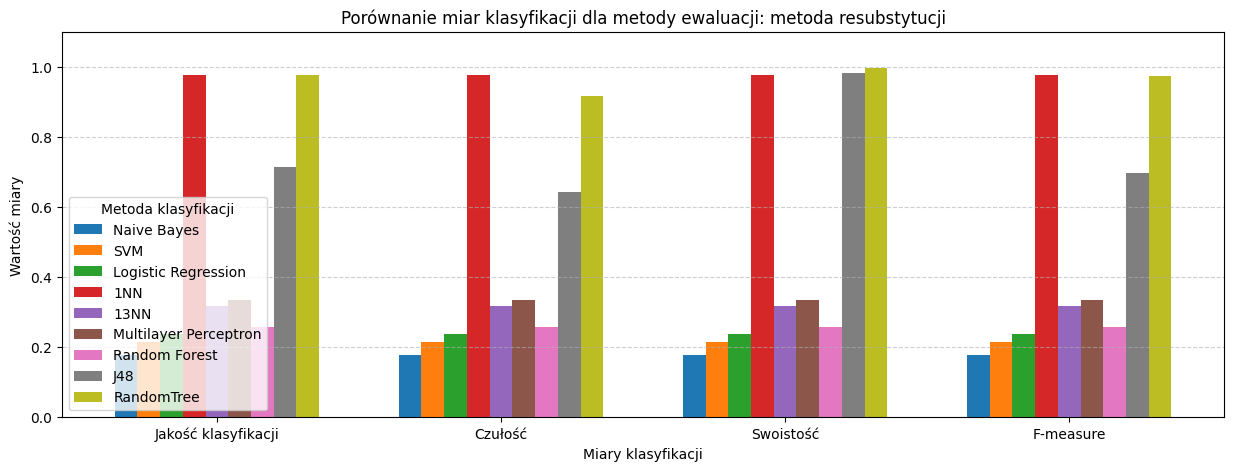

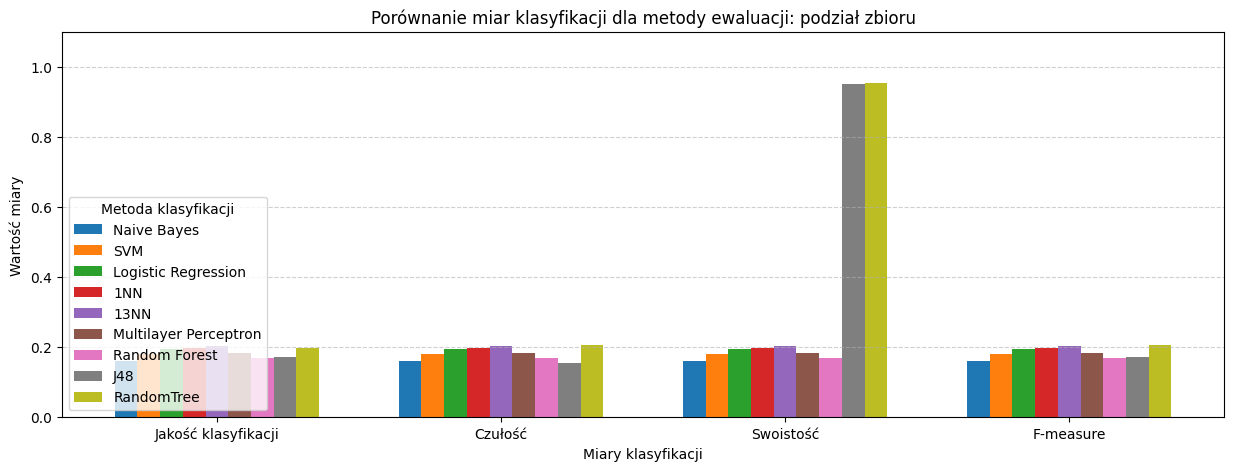

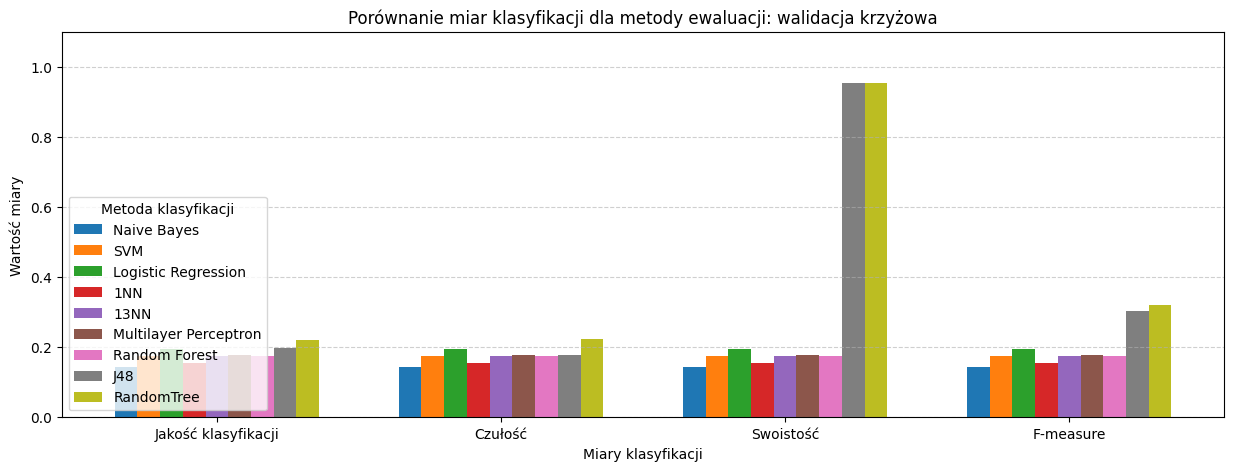

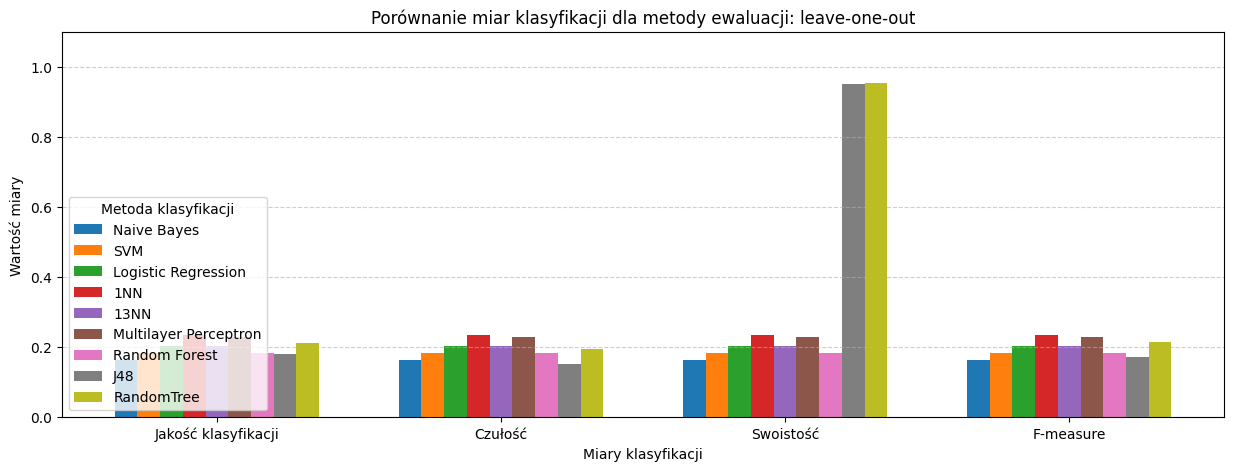

In [32]:
# Wykresy wartości miar klasyfikacji dla każdej z metod ewaluacji 
unique_evaluation_methods = classification_df["Typ metody ewaluacji"].unique()
metrics = ["Jakość klasyfikacji", "Czułość", "Swoistość", "F-measure"]

for method in unique_evaluation_methods:
    filtered_df = classification_df[classification_df["Typ metody ewaluacji"] == method]

    x = np.arange(len(metrics))
    bar_width = 0.08
    offsets = np.arange(len(filtered_df["Typ metody klasyfikacji"])) * bar_width

    plt.figure(figsize=(15, 5))

    for i, classifier in enumerate(filtered_df["Typ metody klasyfikacji"].unique()):
        classifier_values = filtered_df[filtered_df["Typ metody klasyfikacji"] == classifier][metrics].iloc[0]
        plt.bar(x + offsets[i], classifier_values, width=bar_width, label=classifier)

    plt.title(f"Porównanie miar klasyfikacji dla metody ewaluacji: {method}")
    plt.xlabel("Miary klasyfikacji")
    plt.ylabel("Wartość miary")
    plt.xticks(x + bar_width * (len(filtered_df["Typ metody klasyfikacji"].unique()) - 1) / 2, metrics)
    plt.ylim(0, 1.1)
    plt.grid(True, linestyle='--', alpha=0.6, axis='y')
    plt.legend(title="Metoda klasyfikacji", loc="lower left")
    plt.show()

### Wnioski

Analizując różne metody klasyfikacji przy różnych podejściach ewaluacyjnych, możemy wyróżnić kilka kluczowych metod:

* **1NN**

Osiąga najwyższą jakość klasyfikacji dla metody resubstytucji (0,976), tak jak w metodzie Random Tree, ale wynik drastycznie spada przy użyciu bardziej realistycznych metod ewaluacji jak leave-one-out (0,234) czy walidacja krzyżowa (0,155). Również przy użyciu metody resubstytucji, widoczne są wyraźne różnice pod względem wartości czułości, swoistości i F-measure w porównaniu z pozostałymi metodami ewaluacji. Cechuje się jedną z najwyższych wartości czułości i swoistości spośród metod klasyfikacji (poza walidacją krzyżową).

* **13NN** 

Wyniki są bardziej stabilne niż dla 1NN, ale nie są najlepsze (metoda resubstytucji: 0,318, walidacja krzyżowa: 0,174, leave-one-out: 0.202).
Lepiej sobie radzi z rozpoznawaniem zarówno przypadków negatywnych, jak i pozytywnych (wyższa czułość i swoistość oprócz metod resubstytucji i leave-one-out).

* **J48**

Osiąga lepszą stabilność wyników niż 1NN poza swoistością (prawdopodobnie wynika to z kwestii implementacji metody wyznaczającej tę statystykę w środowisku R). Jednakże, model ten osiąga gorsze wyniki od drugiej metody z biblioteki RWeka, czyli Random Tree.
Jakość klasyfikacji dla metody resubstytucji wynosi 0,714, lecz spada aż do poziomu 0,197 przy wykorzystaniu walidacji krzyżowej, co jest wynikiem niższym niż w przypadku metody Random Tree (0,220). Bardzo wysoka swoistość (0,983) w każdej z metod ewaluacji sugeruje, że model dobrze rozpoznaje negatywne przypadki (należy jednak zauważyć nieproporcjonalny wzrost względem
pozostałych metod klasyfikacji zaimplementowanych w Pythonie).

* **Logistic Regression**

Metoda ta prowadzi do uzyskania wyników wyższych od tych otrzymanych za pomocą metod Naive Bayes i SVM, niezależnie od metody ewaluacji (0,238 dla metody resubstytucji, 0,195 dla walidacji krzyżowej, 0,202 dla leave-one-out).
Jest metodą radzącą sobie dość dobrze z klasyfikacją zaprezentowanych danych, lecz na ogół przegrywa z metodami 1NN i 13NN (poza walidacją krzyżową). Wyniki otrzymane za pomocą tej metody również nie są stabilne ze względu na metody ewaluacji.

* **Multilayer Perceptron** 

Osiąga dość dobre wyniki, choć w zależności od metody ewaluacji są one niższe lub wyższe od metod wcześniej omówionych (wyższe przy metodzie leave-one-out - 0,230 i metodzie resubstytucji - 0,334, niższe przy podziale zbioru - 0,184 oraz walidacji krzyżowej - 0,178). Świadczy to o niestabilności wyników przy użyciu tego modelu. Warty odnotowania jest również czas uczenia takiego modelu, który w przypadku analizowanych danych wyniósł 6 minut, podczas gdy inne metody wymagały czasu co najmniej o połowę krótszego.


**Ogólne wnioski odnośnie metod ewaluacji**

Metoda resubstytucji zawsze daje najwyższe wartości każdej z miar, co sugeruje silne przeuczenie przy użyciu tej metody ewaluacji.
Walidacja krzyżowa i leave-one-out są bardziej realistycznymi metodami oceny, pokazując rzeczywistą skuteczność klasyfikatora na nowych danych.


**Wyróżnienie najlepszych metod klasyfikacji**

1NN i J48 mają najwyższą swoistość w metodzie resubstytucji, ale ich czułość mocno spada w walidacji krzyżowej.
1NN charakteryzuje się najlepszym balansem między czułością i swoistością – co sugeruje, że może być najlepszym wyborem.
Wartość F-measure jest najniższa dla regresji logistycznej i najwyższa dla J48 i 1NN w metodzie resubstytucji.

Podsumowując, w oparciu o analizę miar klasyfikacji użytych do zbadania metod klasyfikacji na wybranych danych można stwierdzić, iż metoda 1NN najlepiej nadaje się do klasyfikacji Pokémonów bazując na ich statystykach. W celu ewaluacji takiego modelu polecane są metody leave-one-out i podział zbioru.